In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def make_cifar10(batch_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    
    return trainset, trainloader, testset, testloader

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Files already downloaded and verified
Files already downloaded and verified


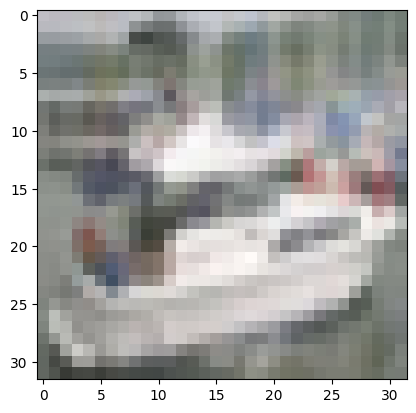

In [4]:
# 학습데이터 가져오기
trainset, trainloader, testset, testloader= make_cifar10(1)

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch
from evaluate_cifar10 import evaluate
from unet.unet_model import UNet
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Change here to adapt to your data
# n_channels=3 for RGB images
# n_classes is the number of probabilities you want to get per pixel
model = UNet(n_channels=3, n_classes=3, bilinear=False)
model = model.to(memory_format=torch.channels_last)


model.to(device=device)
val_score = evaluate(model, testloader, device, False)


In [2]:
import torch
from evaluate_cifar10 import evaluate
from unet.unet_model import UNet

# Change here to adapt to your data
# n_channels=3 for RGB images
# n_classes is the number of probabilities you want to get per pixel
model = UNet(n_channels=3, n_classes=3, bilinear=False)

64 128
128 256
256 512
bottle_net? ,  1024
512 1024
bottle_net? ,  512


In [5]:
import torch

def add_gaussian_noise(image, stddev=0.2):
    """
    Add Gaussian noise to an image tensor.

    Args:
        image (torch.Tensor): Input image tensor (batch_size x channels x height x width).
        stddev (float): Standard deviation of the Gaussian noise.

    Returns:
        torch.Tensor: Noisy image tensor with values clamped between 0 and 1.
    """
    # Generate random noise with the same size as the image
    noise = torch.randn_like(image) * stddev

    # Add the noise to the image
    noisy_image = image + noise

    # Clip the pixel values to be in the range [0, 1]
    noisy_image = torch.clamp(noisy_image, 0, 1)

    return noisy_image

In [37]:
def compare_image(original_image, noisy_image, prediction_image):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Prediction_image")
    plt.imshow(prediction_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.show()

In [2]:
train_set, train_loader, val_set, val_loader = make_cifar10(4)

NameError: name 'make_cifar10' is not defined

In [20]:
from skimage.util import random_noise
from torchvision.utils import save_image

def save_noisy_image(img, name):
    if img.size(1) == 3:
        img = img.view(img.size(0), 3, 32, 32)
        save_image(img, name)
    else:
        img = img.view(img.size(0), 1, 28, 28)
        save_image(img, name)
        

In [16]:
def add_gaussian_noise(image, mean=0, var=0.05):
    gauss_img = torch.tensor(random_noise(image, mode='gaussian', mean=mean, var=var, clip=True))
    # save
    # save_noisy_image(gauss_img, f"gaussian.png")
    return gauss_img

In [18]:
def add_salt_pepper_noise(image):
    s_and_p = torch.tensor(random_noise(image, mode='s&p', salt_vs_pepper=0.5, clip=True))
    # save
    # save_noisy_image(s_and_p, f"Images/{args['dataset']}_s&p.png")
    return s_and_p

In [19]:
def add_poisson_noise(image, mean=0.003):
    # poisson_img = torch.tensor(random_noise(image, mode='poisson', mean=0.003, clip=True))
    poisson_img = torch.tensor(random_noise(image, mode='poisson', clip=True))
    return poisson_img

In [25]:
a1=torch.tensor(random_noise(a, mode='gaussian', mean=0, var=0.05, clip=True))
a2=torch.tensor(random_noise(a.cpu().numpy(), mode='gaussian', mean=0, var=0.05, clip=True))



In [28]:
type(a.cpu().numpy())

numpy.ndarray

In [8]:
def compare_noisy_image(original_image, noisy_image, noisy_image2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Gaussian Noisy Image")
    plt.imshow(noisy_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Poisson Noisy Image")
    plt.imshow(noisy_image2.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.show()

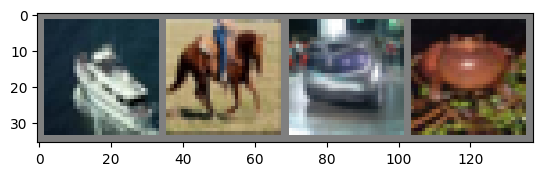

In [31]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity


i = 0
for batch in train_loader:
    if i== 1:
        break
    # print("batch : ", batch)
    # print("len(batch): ",len(batch))
    # print("batch[0]: ",batch[0])
    # # print("batch[1]: ",batch[1])
    # print("batch[0].shape: ",batch[0].shape)
    # print("type(batch[0]): ",type(batch[0]))
    # print("batch[1].shape: ",batch[1].shape)
    # images, true_masks = batch, add_gaussian_noise(batch[0])
    images, true_masks = batch[0], add_gaussian_noise(batch[0], 0.05)
    
    imshow(torchvision.utils.make_grid(images))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


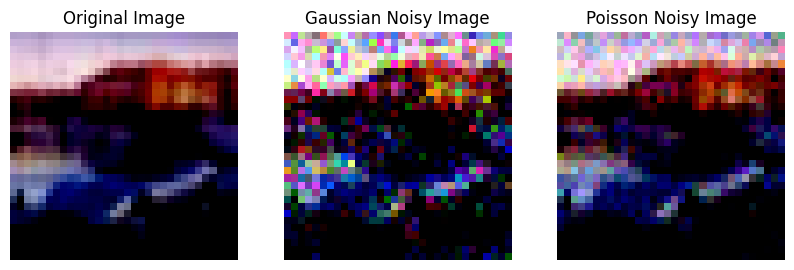

In [33]:
compare_noisy_image(images[0], add_gaussian_noise(images[0].cpu().numpy()), add_poisson_noise(images[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


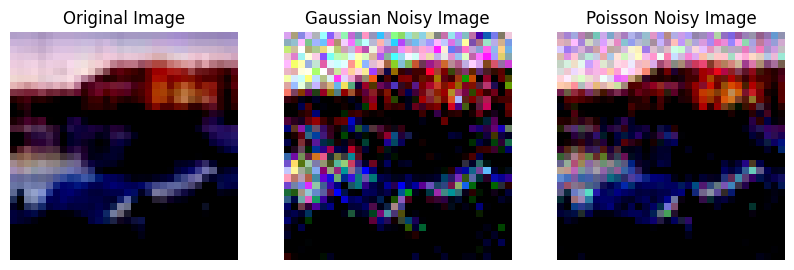

In [34]:
compare_noisy_image(images[0], add_gaussian_noise(images[0]), add_poisson_noise(images[0]))

In [6]:
def make_cifar10(batch_size):
    torch.manual_seed(42)
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    
    return trainset, trainloader, testset, testloader

In [35]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr

train_set, train_loader, val_set, val_loader = make_cifar10(4)
i = 0
for batch in train_loader:
    if i== 1:
        break
    images, true_masks = batch[0], 1
    # 이미지 보여주기
    # save_noisy_image(images[0], f"test.png")
    print(images[0].shape)
    # print(add_gaussian_noise(images[0].cpu().numpy()))
    noisy_image = add_gaussian_noise(batch[0].cpu().numpy())
    print(psnr(noisy_image.cpu().numpy(), batch[0].cpu().numpy()))

    i += 1

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32])
19.25946681352084


/tmp/ipykernel_143819/1626488373.py:20: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print(psnr(noisy_image.cpu().numpy(), batch[0].cpu().numpy()))


In [33]:
type(add_gaussian_noise(batch[0].cpu().numpy()))

torch.Tensor

In [34]:
type(batch[0].cpu().numpy())

numpy.ndarray

In [10]:
from skimage.metrics import peak_signal_noise_ratio as psnr

psnr(noisy_images.cpu().numpy(), pred_images.cpu().numpy())

TypeError: randn_like(): argument 'input' (position 1) must be Tensor, not numpy.ndarray